<a href="https://colab.research.google.com/github/Rishit605/drug-classification/blob/main/Model_Comparisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

We first install the **Lazypredict** library, which is a library that helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

Using this LIbrary we can import, use and compare multiple Machine Learning Models without adjusting or fine tuning any paramters.

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.5 MB 5.3 kB/s 
     |████████████████████████████████| 269 kB 38.3 MB/s 
     |████████████████████████████████| 6.8 MB 33.7 MB/s 
     |████████████████████████████████| 127.6 MB 16 kB/s 
     |████████████████████████████████| 1.2 MB 52.9 MB/s 
     |████████████████████████████████| 248 kB 55.7 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 36.4 MB/s 
     |████████████████████████████████| 302 kB 56.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=d7cb804f01c5af5f571a930d9f0943a23a5fa77d77b7d6ffdfc8aae504c2dbc4
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: nump

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **Loading the Dataset**

In [2]:
df = pd.read_csv('/content/dataset/4bioactivity_class_pIC50__4data_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis =1)
y= df.pIC50

## **Data Preprocessing** 

In [6]:
X.shape

(133, 881)

In [8]:
# Removing Low Varience
from sklearn.feature_selection import VarianceThreshold
selec = VarianceThreshold(threshold=(0.8 * (1 -  0.8)))
X = selec.fit_transform(X)
X.shape

(133, 200)

In [21]:
# Spliting the Train-Test Data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **Comparing Ml Algorithims**

In [22]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:00<00:00, 209465.84it/s]


In [27]:
pd.DataFrame(predictions_train)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,53314238496847601890465871028875931195568271616...,-4823669197333830065222347473711797698138361219...,12198741107911777775894405666324698267750422702...,0.28
KernelRidge,7.39,-4.78,4.22,0.05
LarsCV,2.31,-0.18,1.91,1.15
LassoLars,2.11,0.00,1.76,0.05
DummyRegressor,2.11,0.00,1.76,0.02
Lasso,1.95,0.14,1.63,0.05
ElasticNet,1.68,0.38,1.38,0.03
LassoLarsIC,1.67,0.39,1.37,0.04
PassiveAggressiveRegressor,1.61,0.45,1.31,0.03


In [28]:
pd.DataFrame(predictions_test)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## **Data visualization of model performance**

[(0.0, 1.0)]

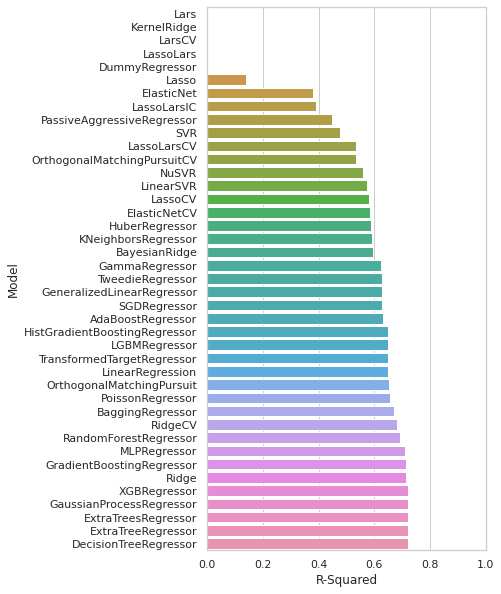

In [29]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

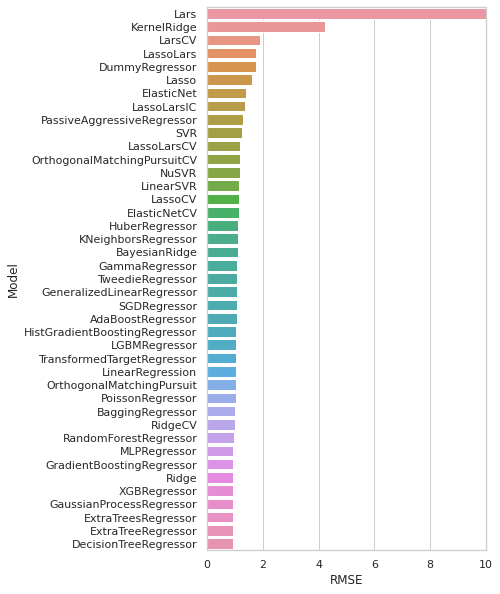

In [30]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

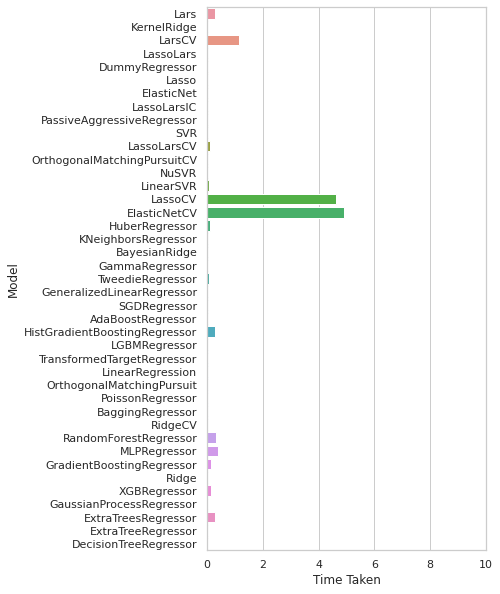

In [31]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))